Reuben Feinman

Math Tools for Neural and Cog. Sci.

Homework #4

11/2/17

# Problem #1

## (a)

Let $B$ denote the case that Mom's second gene is the dominant brown-eyed gene, and $b$ the case that it is the recessive blue-eyed gene. We are given the prior probabilities $P(B) = P(b) = \frac{1}{2}$. Given our observation, $O$, that the child has brown eyes, we can define the conditional probabilities of this observation for each case of Mom as follows (using understanding of genetics):

$P(O|B) = 1$

$P(O|b) = \frac{1}{2}$

Now, what we ultimately want to compute is $P(O|b)$. To do this, we use Baye's Rule:

$P(b|O) = \frac{P(O|b)*P(b)}{P(O)} = \frac{P(O|b)*P(b)}{P(O|b)*P(b) + P(O|B)*P(B)} 
= \frac{\frac{1}{2}*\frac{1}{2}}{\frac{1}{2}*\frac{1}{2} + 1*\frac{1}{2}} 
= \frac{\frac{1}{4}}{\frac{3}{4}} = \frac{1}{3}$

So the probability is $\frac{1}{3}$.

## (b)

Now we have two observations, $O_1, O_2$. Assuming that these two events are conditionally independent (this would be the case in biology), we can compute our joint conditional probabilities as follows:

$P(O_1, O_2|B) = P(O_1|B)*P(O_2|B) = 1*1 = 1$

$P(O_1, O_2|b) = P(O_1|b)*P(O_2|b) = \frac{1}{2}*\frac{1}{2} = \frac{1}{4}$

We can use Baye's Rule to compute $P(b|O_1,O_2)$:

$P(b|O_1,O_2) = \frac{P(O_1,O_2|b)*P(b)}{P(O_1,O_2)} 
= \frac{P(O_1,O_2|b)*P(b)}{P(O_1,O_2|b)*P(b) + P(O_1,O_2|B)*P(B)} 
= \frac{\frac{1}{4}*\frac{1}{2}}{\frac{1}{4}*\frac{1}{2} + 1*\frac{1}{2}} 
= \frac{\frac{1}{8}}{\frac{5}{8}}
= \frac{1}{5}$.

So the probability is $\frac{1}{5}$.

## (c)

Extending upon the generalization we made to get from (a) to (b) above, we get an equation for our target probability as follows:
$
P(b|O_1, ..., O_N) = \frac{P(O_1, ..., O_N|b)*P(b)}{P(O_1, ..., O_N)} 
= \frac{P(O_1, ..., O_N|b)*P(b)}{P(O_1, ..., O_N|b)*P(b) + P(O_1, ..., O_N|B)*P(B)}
= \frac{P(O|b)^N*P(b)}{P(O|b)^N*P(b) + P(O|B)^N*P(B)}
= \frac{(\frac{1}{2})^N*\frac{1}{2}}{(\frac{1}{2})^N*\frac{1}{2} + (1)^N*\frac{1}{2}} 
= \frac{\frac{1}{2^{N+1}}}{\frac{1}{2^{N+1}} + \frac{1}{2}}
= \frac{1}{2^N + 1}
$

So the probability is $\frac{1}{2^N + 1}$.

# Problem #2

In [3]:
from __future__ import division, print_function
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
np.random.seed(0)

## (a)

In [21]:
def randp(p, num):
    # Values contains the set of 10 values we will sample from
    values = np.arange(1, len(p)+1)
    # Iterate 'num' times, sampling from values each time using the 
    # discrete probability vector provided
    samples = [np.random.choice(values, p=p) for _ in range(num)]
    
    return np.asarray(samples)

In [25]:
# set p values so they are all equal, at 1/10 each.
p = np.ones(10)/10
samples = randp(p, 1000)

In [26]:
from collections import Counter

def histogram_discrete(samples, title=None):
    """
    A function that takes an array of categorical samples
    and plots a histogram showing the frequency of each
    category in the array.
    """
    counts = Counter(samples)
    values = list(counts.keys())
    frequencies = list(counts.values())
    plt.figure(figsize=(8, 6))
    plt.bar(values, frequencies)
    plt.xticks(values)
    if title is not None:
        plt.title(title, fontsize=22)
    plt.xlabel('Value', fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    plt.show()
    
def histogram_continuous(samples, title=None, nbins=10):
    """
    A function that takes an array of numeric values and
    plots a histogram of the values, discretized into some
    pre-specified number of bins.
    """
    plt.figure(figsize=(8, 6))
    plt.hist(samples, bins=nbins)
    if title is not None:
        plt.title(title, fontsize=22)
    plt.xlabel('Value', fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    plt.show()

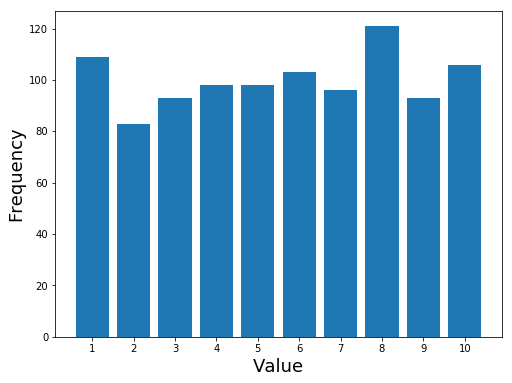

In [27]:
histogram_discrete(samples)

The bars look to be about equal height, which is what we'd expect given our p vector which assigns equal probability to each value.

## (b)

In [38]:
def psum(p, q):
    """
    This function takes as input the PDFs of two discrete
    RVs and returns the PDF of a new RV that is the sum of
    these two input RVs. 
    """
    
    # As we learned in class, to get the PDF for a new RV 
    # that is the sum of two discrete RVs, we simply compute
    # a convolution of the two discrete PDFs.
    return np.convolve(p, q)

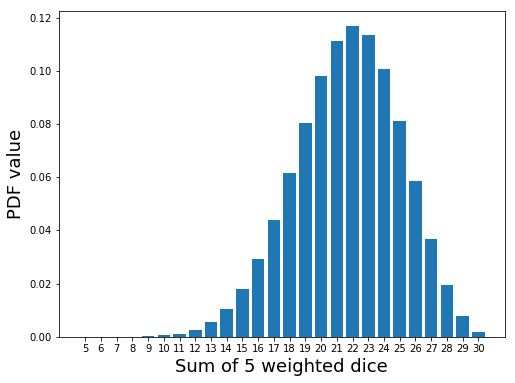

In [78]:
# Now let's test this function as described in the assignment,
# using a weighted die. First, compute the PDF of the die
p = np.arange(1,7)
p = p/np.sum(p)
# Now, compute the PDF for a sum of 5 such die
pdf = p
for _ in range(4):
    pdf = psum(p, pdf)
# Now lets plot the PDF to see what we've come up with
plt.figure(figsize=(8, 6))
plt.bar(range(5, 31), pdf)
plt.xticks(range(5, 31))
plt.xlabel('Sum of 5 weighted dice', fontsize=18)
plt.ylabel('PDF value', fontsize=18)
plt.show()

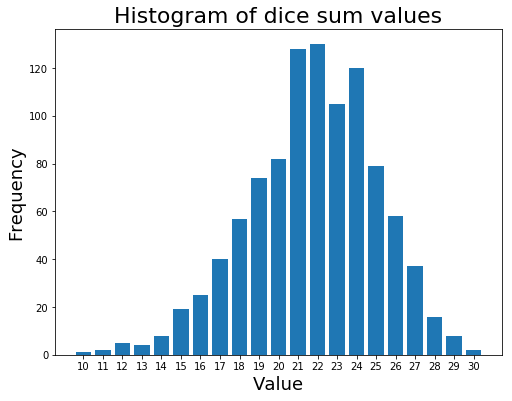

In [79]:
# Now let's verify this PDF empirically. Compute sum of 5 such
# RVs 1000 times. Plot histogram
vals = np.zeros(1000)
for _ in range(5):
    vals += randp(p, 1000)
histogram_discrete(vals, title='Histogram of dice sum values')

The empirical PDF does look quite similar to our theoretical PDF. Let's try increasing the number of samples and plotting it again:

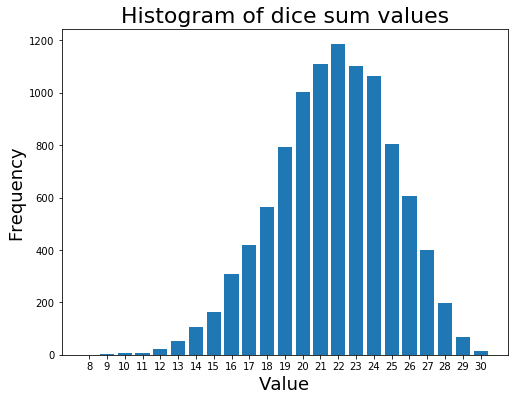

In [80]:
vals = np.zeros(10000)
for _ in range(5):
    vals += randp(p, 10000)
histogram_discrete(vals, title='Histogram of dice sum values')

Now we can say with high confidence that our empricial PDF matches our theoretical PDF. They have the same mean, and the shapes of the two curves are the same.

# Problem #3

## (a)

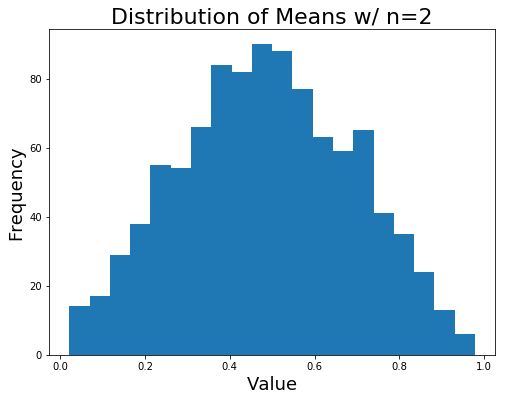

In [7]:
# Try it first with 1000 samples

# Sample 2 values from uniform(0,1) 1000 times 
samples = np.random.uniform(size=(1000, 2))
# Compute the mean of the 2 values for each of our 1000 trials
means = samples.mean(axis=1)
# Plot histogram of these 1000 means
histogram_continuous(means, nbins=20, title="Distribution of Means w/ n=2")

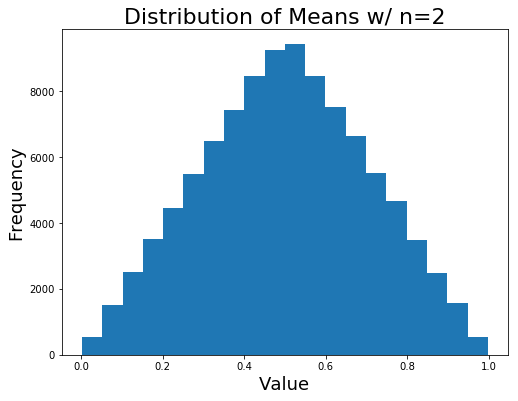

In [8]:
# Try it again with 100,000 samples
samples = np.random.uniform(size=(100000, 2))
means = samples.mean(axis=1)
histogram_continuous(means, nbins=20, title="Distribution of Means w/ n=2")

This distribution has a pyramid-like shape. It's basically an upside-down V. Since $n$ is very small here ($n=2$), we have not quite converged to the Gaussian distribution yet, and hence we get these rigid-looking edges.

## (b)

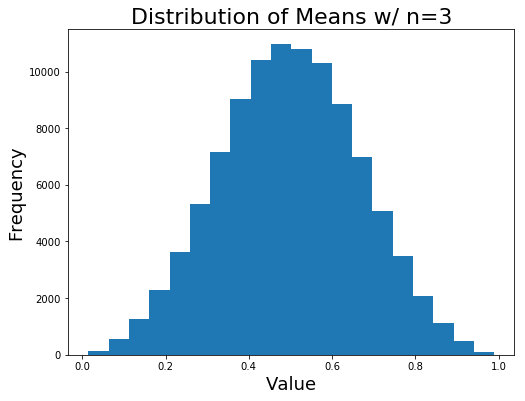

In [9]:
# Try n=3
samples = np.random.uniform(size=(100000, 3))
means = samples.mean(axis=1)
histogram_continuous(means, nbins=20, title="Distribution of Means w/ n=3")

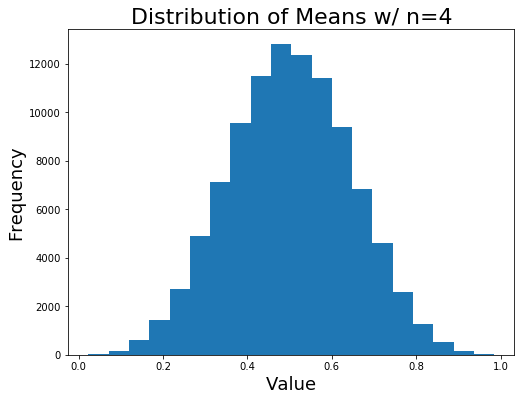

In [10]:
# Try n=4
samples = np.random.uniform(size=(100000, 4))
means = samples.mean(axis=1)
histogram_continuous(means, nbins=20, title="Distribution of Means w/ n=4")

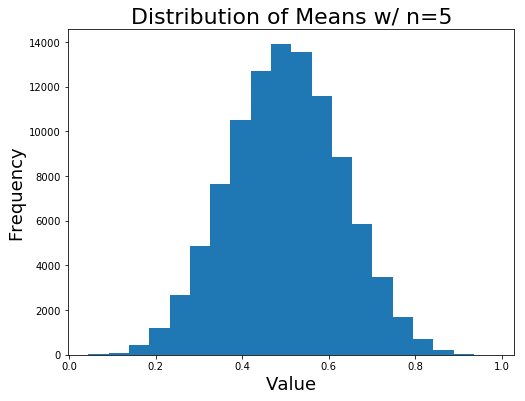

In [11]:
# Try n=5
samples = np.random.uniform(size=(100000, 5))
means = samples.mean(axis=1)
histogram_continuous(means, nbins=20, title="Distribution of Means w/ n=5")

The edges of the pyramid have started caving inward, making the curve look less like a pyramid and more like our Gaussian distribution. The curve starts looking normal around n=4.

## (c)

In [14]:
from scipy import stats

def normplot(x):
    """
    A function to replicate Matlab's "normplot" functionality. Takes
    a set of points and displays the Q-Q plot for these points.
    """
    plt.figure(figsize=(10,8))
    # Calculate quantiles and least-square-fit curve
    (quantiles, values), (slope, intercept, r) = stats.probplot(x, dist='norm')
    # Plot results
    plt.plot(values, quantiles,'ob', marker='+')
    plt.plot(quantiles * slope + intercept, quantiles, 'r')
    #define ticks
    ticks_perc=[1, 5, 10, 20, 50, 80, 90, 95, 99]
    # Transfrom them from precentile to cumulative density
    ticks_quan=[stats.norm.ppf(i/100.) for i in ticks_perc]
    # Assign new ticks
    plt.yticks(ticks_quan,ticks_perc)
    plt.ylabel('Probability (%)', fontsize=18)
    plt.xlabel('Data', fontsize=18)
    plt.show()

Trial #1


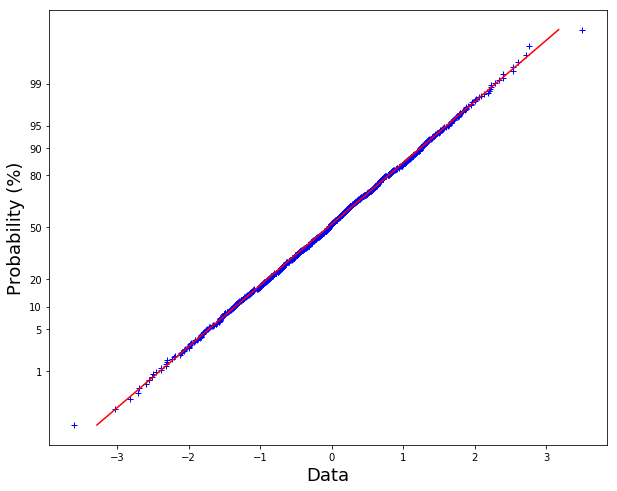

Trial #2


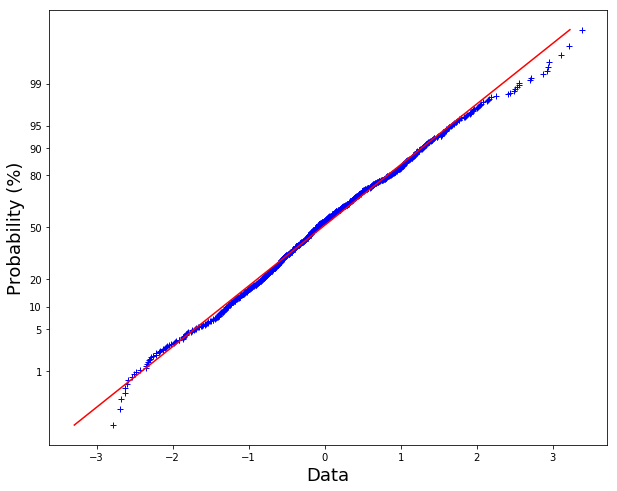

Trial #3


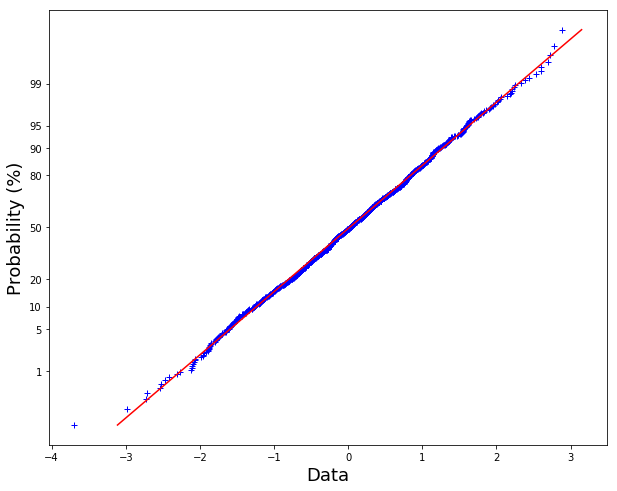

In [17]:
# Let's try sampling 1000 points from a Gaussian with mean 0 and
# scale 1. Repeat a few times and plot each time.
for i in range(1,4):
    print('Trial #%i' % i)
    x = np.random.normal(size=1000)
    normplot(x)

The plot varies only a little bit for each of the 3 runs. For the most part, we see a straight line as expected.

## (d)

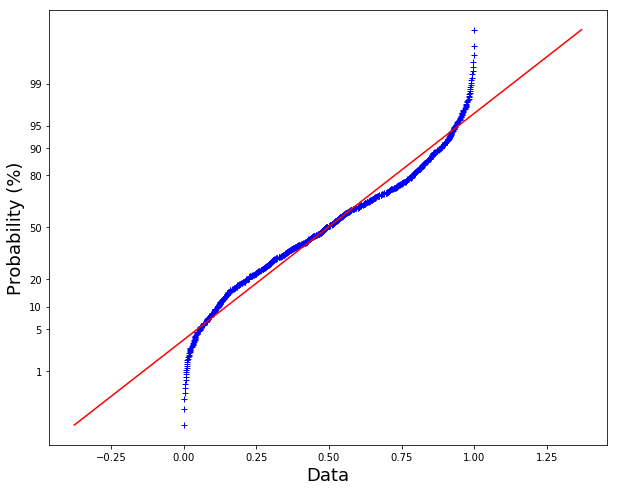

In [65]:
# Let's now try this type of plot w/ samples from a 
# uniform distribution
samples = np.random.uniform(size=1000)
normplot(samples)

The reason... TODO

Trying with n=2:


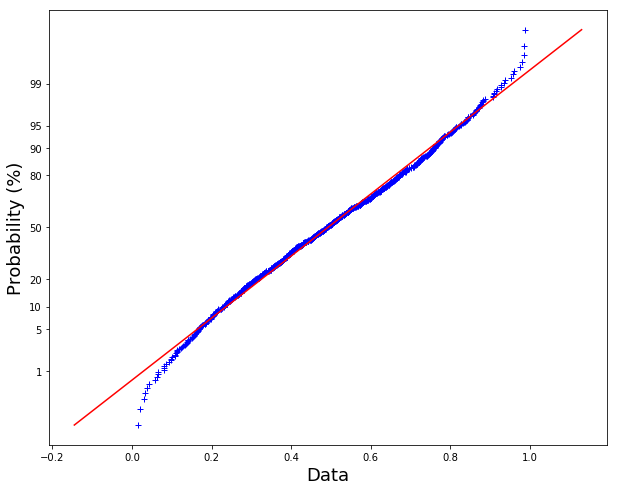

Trying with n=3:


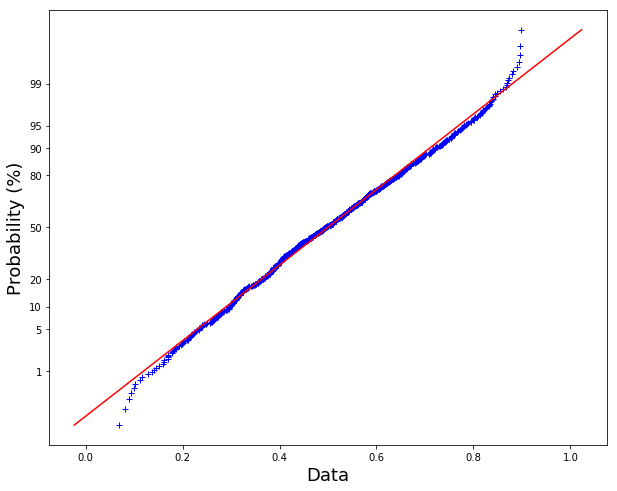

Trying with n=4:


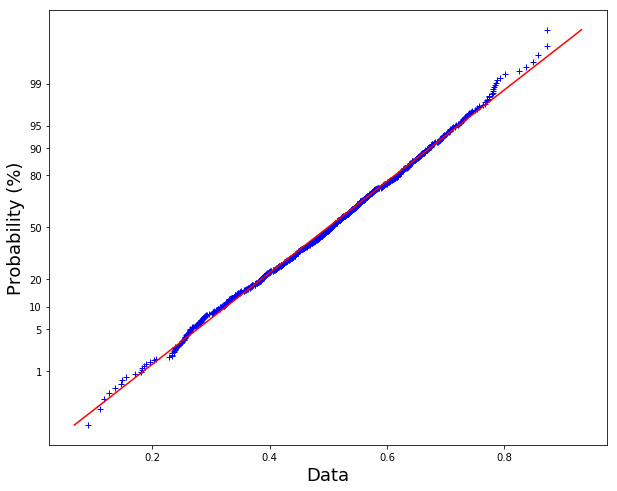

Trying with n=5:


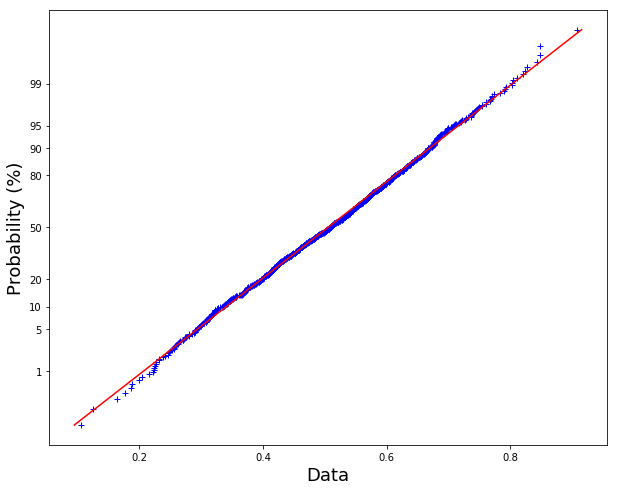

Trying with n=6:


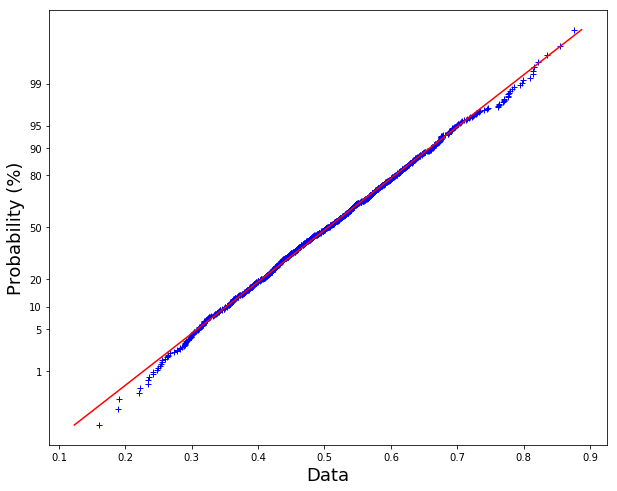

Trying with n=7:


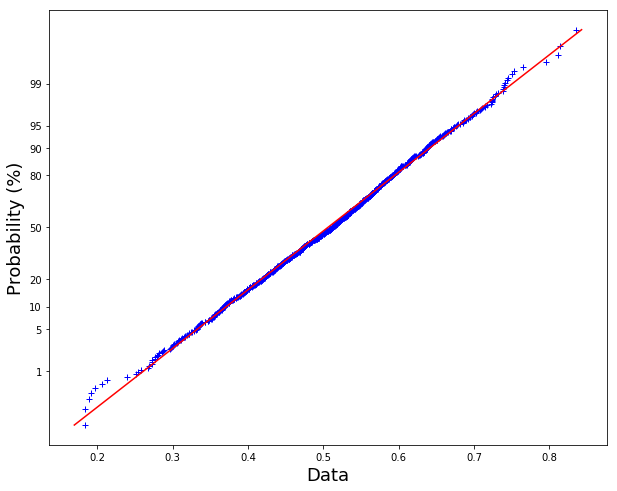

Trying with n=8:


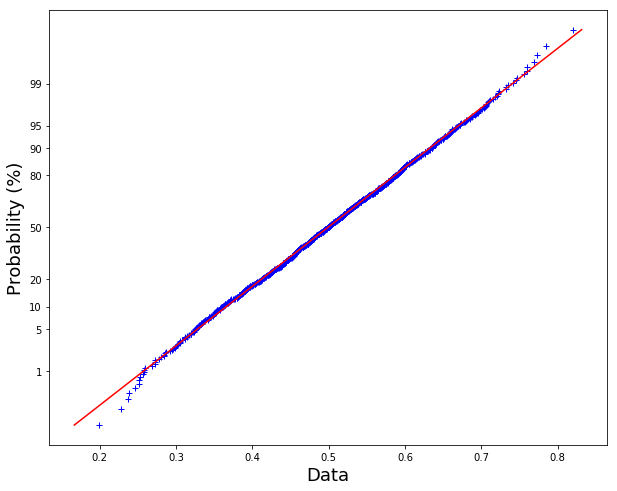

In [68]:
# Now let's try with the MEANS of a n-sample normal distribution.
# We will will vary the value of n from 2:8.

for n in range(2, 9):
    print("Trying with n=%i:" % n)
    samples = np.random.uniform(size=(1000, n))
    means = samples.mean(axis=1)
    normplot(means)

We can see that by the time we get to n=4, the line looks approximately linear like our Gaussian data. Thus, the sample size needs to be at least size 4.

# Problem #4